## Importing Environments

In [0]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import os
import zipfile
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
import cv2
import os

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing all the 5 classes of animal samples

In [0]:
train_butterfly_dir = os.path.join(r'/content/drive/My Drive/image classification/animals/raw-img/training/butterfly')
train_cat_dir = os.path.join(r'/content/drive/My Drive/image classification/animals/raw-img/training/cat')
train_dog_dir = os.path.join(r'/content/drive/My Drive/image classification/animals/raw-img/training/dog')
train_cow_dir = os.path.join(r'/content/drive/My Drive/image classification/animals/raw-img/training/cow')
train_elephant_dir = os.path.join(r'/content/drive/My Drive/image classification/animals/raw-img/training/elephant')

In [48]:
train_dog = os.listdir(train_dog_dir)
train_elephant = os.listdir(train_elephant_dir)
train_butterfly = os.listdir(train_butterfly_dir)
train_cat = os.listdir(train_cat_dir)
train_cow = os.listdir(train_cow_dir)

print (train_dog[:10])

['OIP-6do18OF3FYx4L_Vhqc4MYgHaGa.jpeg', 'OIP-6C95FLp1pqSILB-UvXNwWgHaFj.jpeg', 'OIP-6AIl3KxbPulVJFYnZ6DWFwAAAA.jpeg', 'OIP-6EgXp_oo_zj9rffCZuTeiQHaEn.jpeg', 'OIP-6fclz7wTCmEYt7I8U44duQHaE_.jpeg', 'OIP-6IiD_hPHh4wc9_vI4iW4RAHaFj.jpeg', 'OIP-6furhdTd-uDJOqgJSnaBmQHaEL.jpeg', 'OIP-6fVdgI5d2doTMiHrSFyn_gHaJ3.jpeg', 'OIP-6h6FkS-JKOktAxnChDOCvwHaFj.jpeg', 'OIP-6ID1W9vWSfRIZem6NV_HHQHaE7.jpeg']


### Finding number of training samples for each kind of animal

In [49]:
directory = r'/content/drive/My Drive/image classification/animals/raw-img/training/'

print ('The number of training samples for each class:\n')
for file_name in os.listdir(directory): 
    print ('Size of the training samples for the class', file_name, ':', len(os.listdir(directory + '/' + file_name)))
    
validation_directory = r'/content/drive/My Drive/image classification/animals/raw-img/validation/'

print ('\n\nThe number of validation samples for each class:\n')
for file_name in os.listdir(directory): 
    print ('Size of the validation samples for the class', file_name, ':', len(os.listdir(validation_directory + '/' + file_name)))

The number of training samples for each class:

Size of the training samples for the class cow : 1536
Size of the training samples for the class cat : 1452
Size of the training samples for the class butterfly : 1500
Size of the training samples for the class elephant : 996
Size of the training samples for the class dog : 1500


The number of validation samples for each class:

Size of the validation samples for the class cow : 503
Size of the validation samples for the class cat : 489
Size of the validation samples for the class butterfly : 480
Size of the validation samples for the class elephant : 487
Size of the validation samples for the class dog : 480


### Displaying the sample images

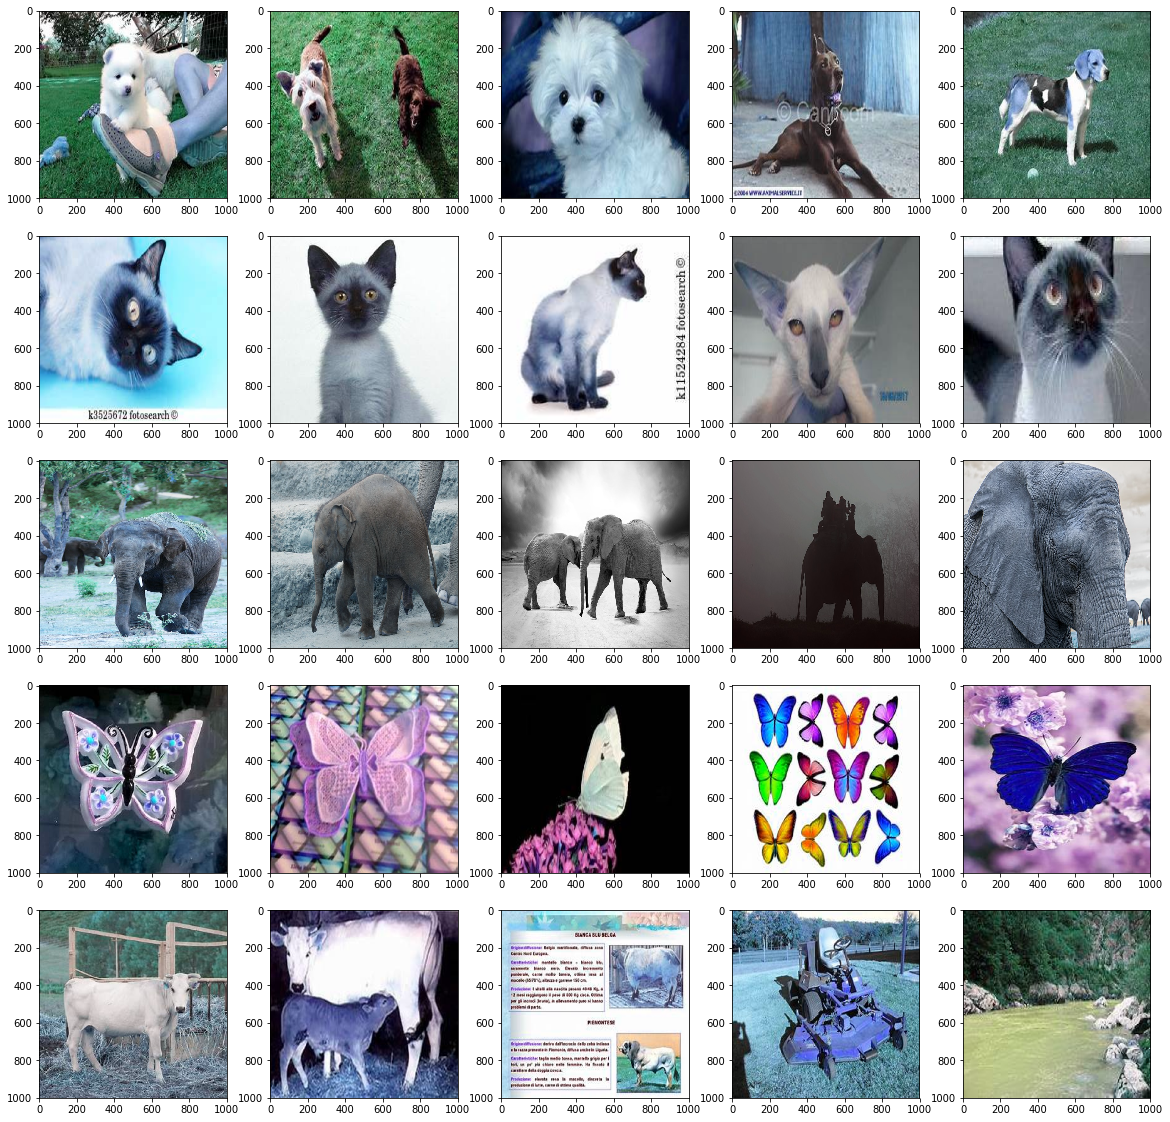

In [50]:
directory = r'/content/drive/My Drive/image classification/animals/raw-img/training/'

categories = {0:'dog', 1:'cat', 2:'elephant', 3:'butterfly', 4:'cow'}
training_data = []
training_label = []

for key, value in categories.items():
    cnt = 0
    path = os.path.join(directory + value)
    for img in os.listdir(path):
        if (cnt >= 5 and value != 'dog'):
            break
        elif (cnt >= 6 and value == 'dog'):
            break
        img_array = cv2.imread(os.path.join(path,img))
        resize_array = cv2.resize(img_array, (1000,1000))
        img_label = key
        training_data.append(resize_array)
        training_label.append(img_label)
        cnt += 1

        

w=5
h=5
fig=plt.figure(figsize=(20,20))
columns = 5
rows = 5
for i in range(1, columns*rows+1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(training_data[i])
plt.show()

### Training

In [51]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),   # This layer is used to flatten the input data matrix

    tf.keras.layers.Dense(512, activation='relu'),
   
    tf.keras.layers.Dense(5, activation='softmax')  # The output is the probability consisting of 5 classes - dog, cat, elephant, butterfly, cow.
])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### Overall summary of the model

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

### The Adam optimizer is chosen for multi-class classification, with a learning rate of 0.01

In [0]:
opt = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics=['acc'])

In [59]:
# All images will are normalized from 0 - 255 to 0 - 1

train_datagen = ImageDataGenerator(rescale = 1/255.0)
validation_datagen = ImageDataGenerator(rescale = 1/255.0)




# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        r'/content/drive/My Drive/image classification/animals/raw-img/training/',      # Source directory for training the images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        class_mode='sparse',
        classes = ['dog','elephant','cow','butterfly','cat'],
        shuffle =  True
        )

validation_generator = validation_datagen.flow_from_directory(
          r'/content/drive/My Drive/image classification/animals/raw-img/validation/',  # Source directory for validating the images
          target_size=(300, 300),  # All images will be resized to 150x150
          batch_size=64,
          class_mode='sparse',
          classes = ['dog','elephant','cow','butterfly','cat'],
          shuffle =  True
        )

Found 6984 images belonging to 5 classes.
Found 2439 images belonging to 5 classes.


### Training the model to 30 epochs

In [60]:
history = model.fit_generator(
                              train_generator, 
                              steps_per_epoch=8,  
                              epochs=30,
                              verbose=1,
                              validation_data = validation_generator,
                              validation_steps=8
                             )

Epoch 1/30
8/8 [==============================] - 165s 21s/step - loss: 1.5655 - acc: 0.2637 - val_loss: 1.7164 - val_acc: 0.1973
Epoch 2/30
8/8 [==============================] - 7s 910ms/step - loss: 1.4972 - acc: 0.3262 - val_loss: 1.5309 - val_acc: 0.2793
Epoch 3/30
8/8 [==============================] - 8s 938ms/step - loss: 1.3736 - acc: 0.4082 - val_loss: 1.5364 - val_acc: 0.3711
Epoch 4/30
8/8 [==============================] - 8s 1s/step - loss: 1.2686 - acc: 0.4659 - val_loss: 1.3998 - val_acc: 0.4316
Epoch 5/30
8/8 [==============================] - 7s 870ms/step - loss: 1.2339 - acc: 0.4775 - val_loss: 1.3957 - val_acc: 0.4336
Epoch 6/30
8/8 [==============================] - 7s 846ms/step - loss: 1.1762 - acc: 0.5439 - val_loss: 1.3170 - val_acc: 0.4688
Epoch 7/30
8/8 [==============================] - 8s 938ms/step - loss: 1.1552 - acc: 0.5479 - val_loss: 1.2739 - val_acc: 0.4609
Epoch 8/30
8/8 [==============================] - 7s 913ms/step - loss: 1.0826 - acc: 0.5664 

### Visualization of the intermediate results between each layers

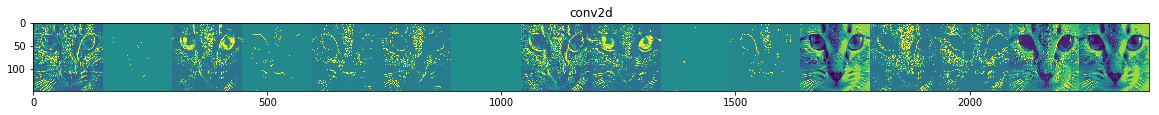

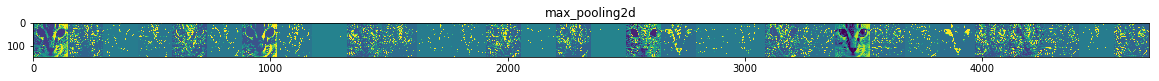

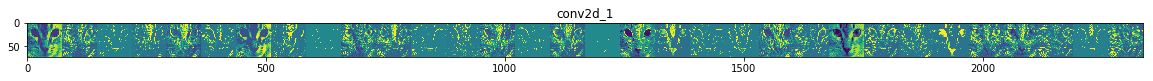

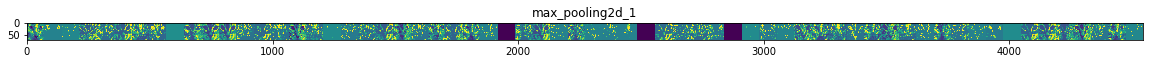

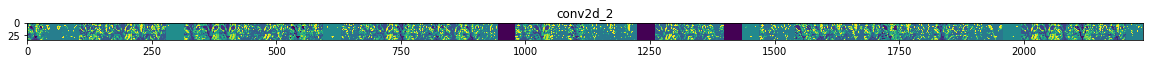

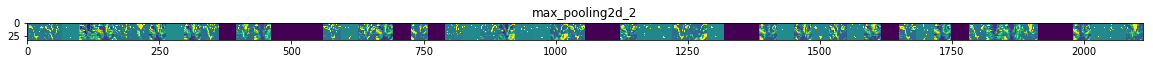

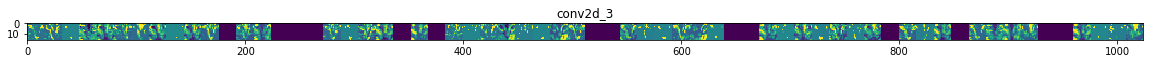

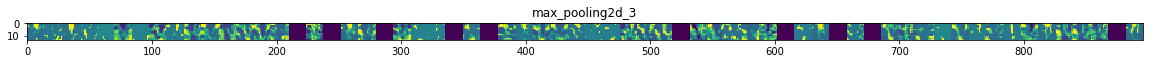

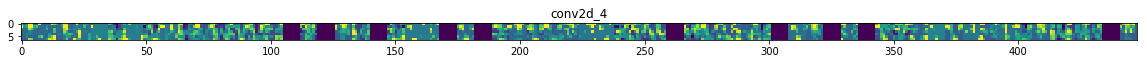

In [62]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

rcParams['figure.figsize'] = 20,11

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
butterfly_img_files = [os.path.join(train_butterfly_dir, f) for f in train_butterfly]
cat_img_files = [os.path.join(train_cat_dir, f) for f in train_cat]
img_path = np.random.choice(butterfly_img_files + cat_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

### Visualization of the results - Loss and Accuracy

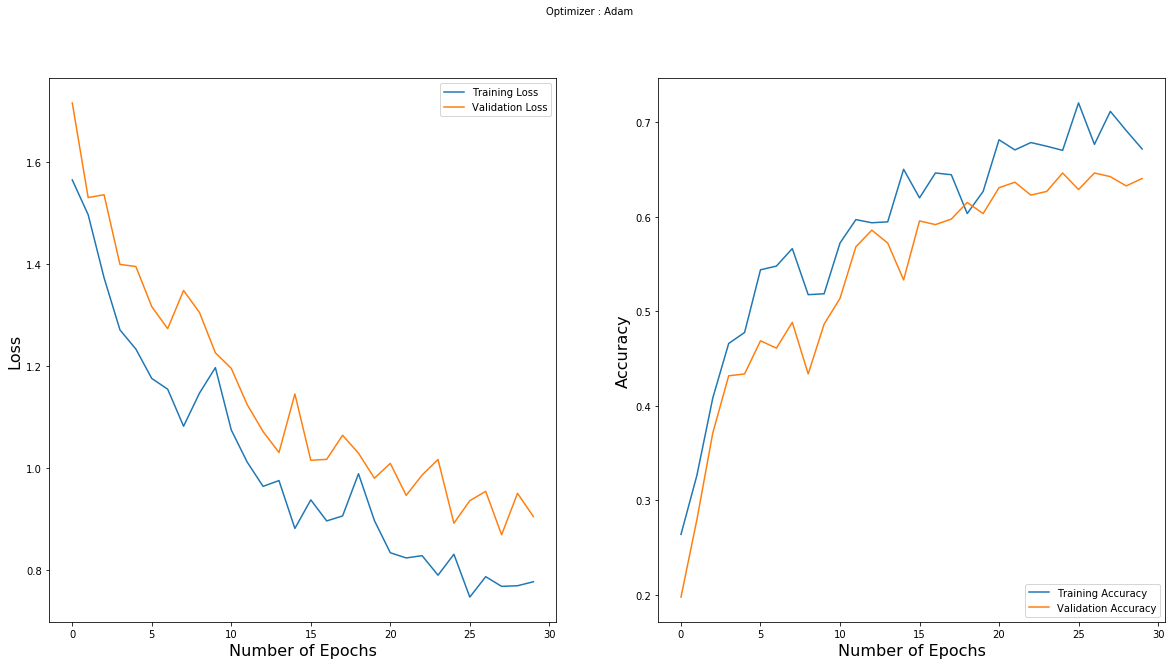

In [63]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Number of Epochs', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Number of Epochs', fontsize=16)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# ResNet -- Residual Network model

#### Importing the train and test images using "open CV". The imported images are resized to 224 x 224. Also, the images pixels are normalized fro (0,255) to (0,1).

In [0]:
def import_images(directory):
    categories = {0:'dog', 1:'cat', 2:'elephant', 3:'butterfly', 4:'cow'}
    data = []
    label = []

    for key, value in categories.items():
        cnt = 0
        path = os.path.join(directory + value)
        for img in os.listdir(path): 
            if (cnt > 1500):
                break
            
            img_array = cv2.imread(os.path.join(path,img))
            resize_array = cv2.resize(img_array, (224,224))
            resize_array = resize_array / 255.0
            img_label = key
            data.append(resize_array)
            label.append(img_label)
            cnt += 1
    
    return (data, label)

In [0]:
data, label = import_images (r'/content/drive/My Drive/image classification/animals/raw-img/training/')

### Shuffling the images before splitting the data.

In [0]:
import random

combined = list(zip(data, label))
random.shuffle(combined)
data[:], label[:] = zip(*combined)

In [0]:
X = np.asarray(data)
Y = np.asarray(label)
del (data)
del (label)

### Splitting the data to Training and Testing with a ratio of 30%

In [0]:
X_train, X_test = X[:5000,:,:,:], X[5000:,:,:,:]
Y_train, Y_test = Y[:5000], Y[5000:]

In [15]:
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(5000, 224, 224, 3)
(1949, 224, 224, 3)
(5000,)
(1949,)


### Converting the multi-dimensional image labels to one-hot model

In [0]:
def convert_to_one_hot(data, classes):
    Y = np.eye(classes)[data.reshape(-1)].T
    return Y
  

num_classes = 5
Y_train = convert_to_one_hot(Y_train, num_classes).T
Y_test = convert_to_one_hot(Y_test, num_classes).T

In [17]:
print (Y_train.shape)
print (Y_test.shape)

(5000, 5)
(1949, 5)


In [0]:
# De-allocating the unused memory

del (X)
del (Y)

### Training the model with ResNet 50 imported from Keras which consists of 50 layers of deep network

In [19]:
from keras import applications
import warnings
warnings.filterwarnings('ignore')


img_height,img_width = 224, 224 
num_classes = 5

#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))



base_model = applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (img_height,img_width,3))


Using TensorFlow backend.


In [21]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.models import Sequential,Model,load_model


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [22]:
from keras.optimizers import SGD, Adam

# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

### Training the model with 25 epochs

In [23]:
history_resnet = model.fit(X_train, Y_train, epochs = 25, batch_size = 64, validation_data=(X_test, Y_test), shuffle = True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 5000 samples, validate on 1949 samples
Epoch 1/25
5000/5000 [==============================] - 170s 34ms/step - loss: 2.0145 - acc: 0.3238 - val_loss: 2.9576 - val_acc: 0.3930
Epoch 2/25
5000/5000 [==============================] - 147s 29ms/step - loss: 1.5672 - acc: 0.3858 - val_loss: 1.4698 - val_acc: 0.4751
Epoch 3/25
5000/5000 [==============================] - 147s 29ms/step - loss: 1.3460 - acc: 0.4538 - val_loss: 1.3557 - val_acc: 0.4705
Epoch 4/25
5000/5000 [==============================] - 147s 29ms/step - loss: 1.2323 - acc: 0.4920 - val_loss: 1.2635 - val_acc: 0.4772
Epoch 5/25
5000/5000 [==============================] - 146s 29ms/step - loss: 1.1135 - acc: 0.5496 - val_loss: 1.3453 - val_acc: 0.4684
Epoch 6/25
5000/5000 [==============================] - 146s 29ms/step - loss: 0.9932 - acc: 0.5814 - val_loss: 1.3941 - val_acc: 0.4489
Epoch 7/25
5000/5000 [============

### Visualization of the results - Loss and Accuracy

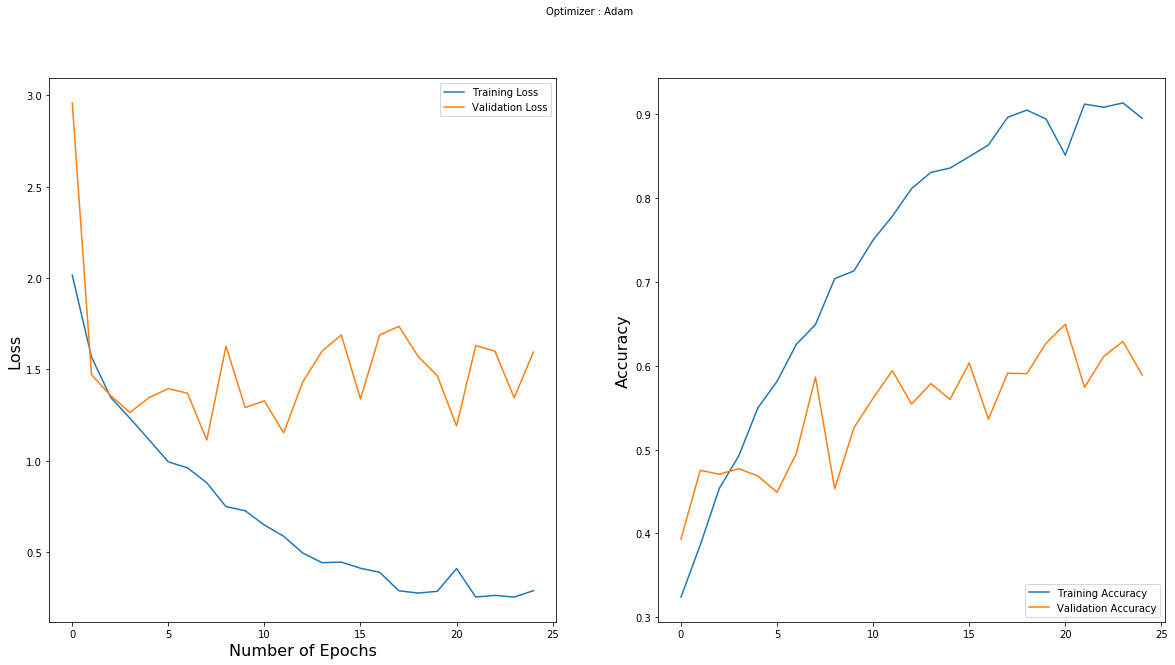

In [25]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Number of Epochs', fontsize=16)
plt.plot(history_resnet.history['loss'], label='Training Loss')
plt.plot(history_resnet.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Number of Epochs', fontsize=16)
plt.plot(history_resnet.history['acc'], label='Training Accuracy')
plt.plot(history_resnet.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [28]:
predictions = model.predict (X_test, verbose = 1)

1949/1949 [==============================] - 18s 9ms/step


### Plot of Confusion matrix

<Figure size 432x288 with 0 Axes>

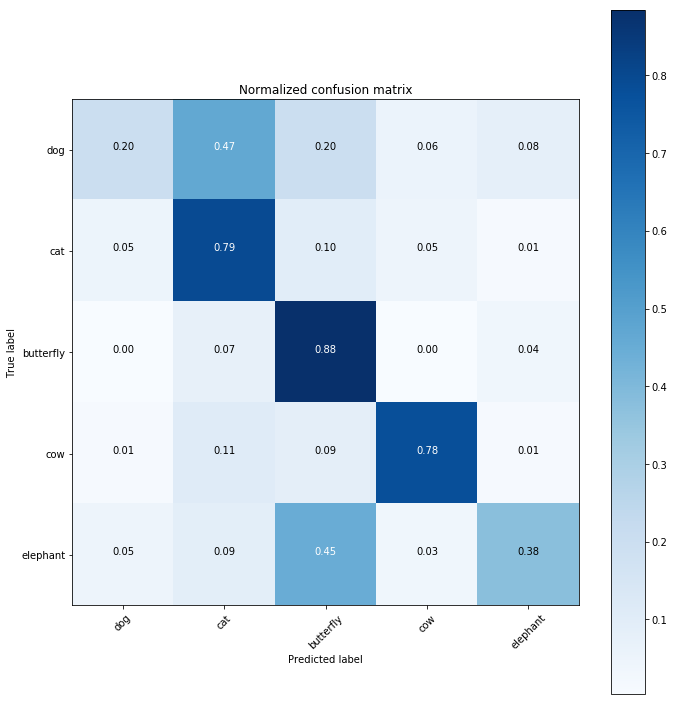

In [45]:
y_pred = [np.argmax(probas) for probas in predictions]
y_test =  np.argmax(Y_test, axis=1)
class_names = ['dog','cat','butterfly','cow','elephant']

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()